### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import scipy.stats as stats


##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

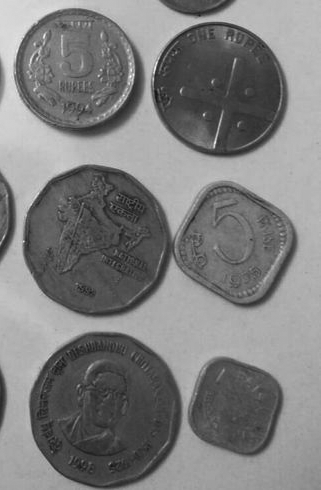

In [85]:
coins = cv2.imread('Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

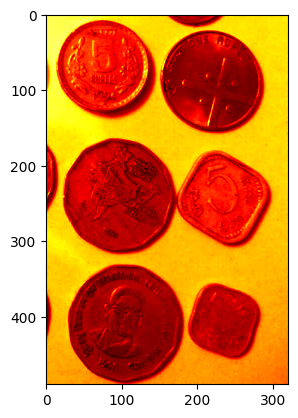

In [86]:
plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

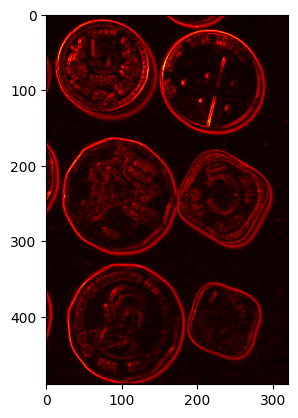

In [87]:
sobelx = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobely = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
mag = cv2.magnitude(sobelx, sobely)
plt.imshow(mag, cmap='hot')

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

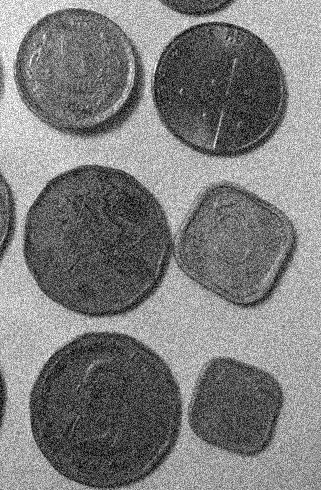

In [89]:
coins_noise = cv2.imread('Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

In [90]:
def canny_gauss(img, k_size, t_low, t_high):
    
    blurred_image = cv2.GaussianBlur(img, (k_size, k_size), 0)
    
    edges = cv2.Canny(blurred_image, t_low, t_high)
    
    return edges

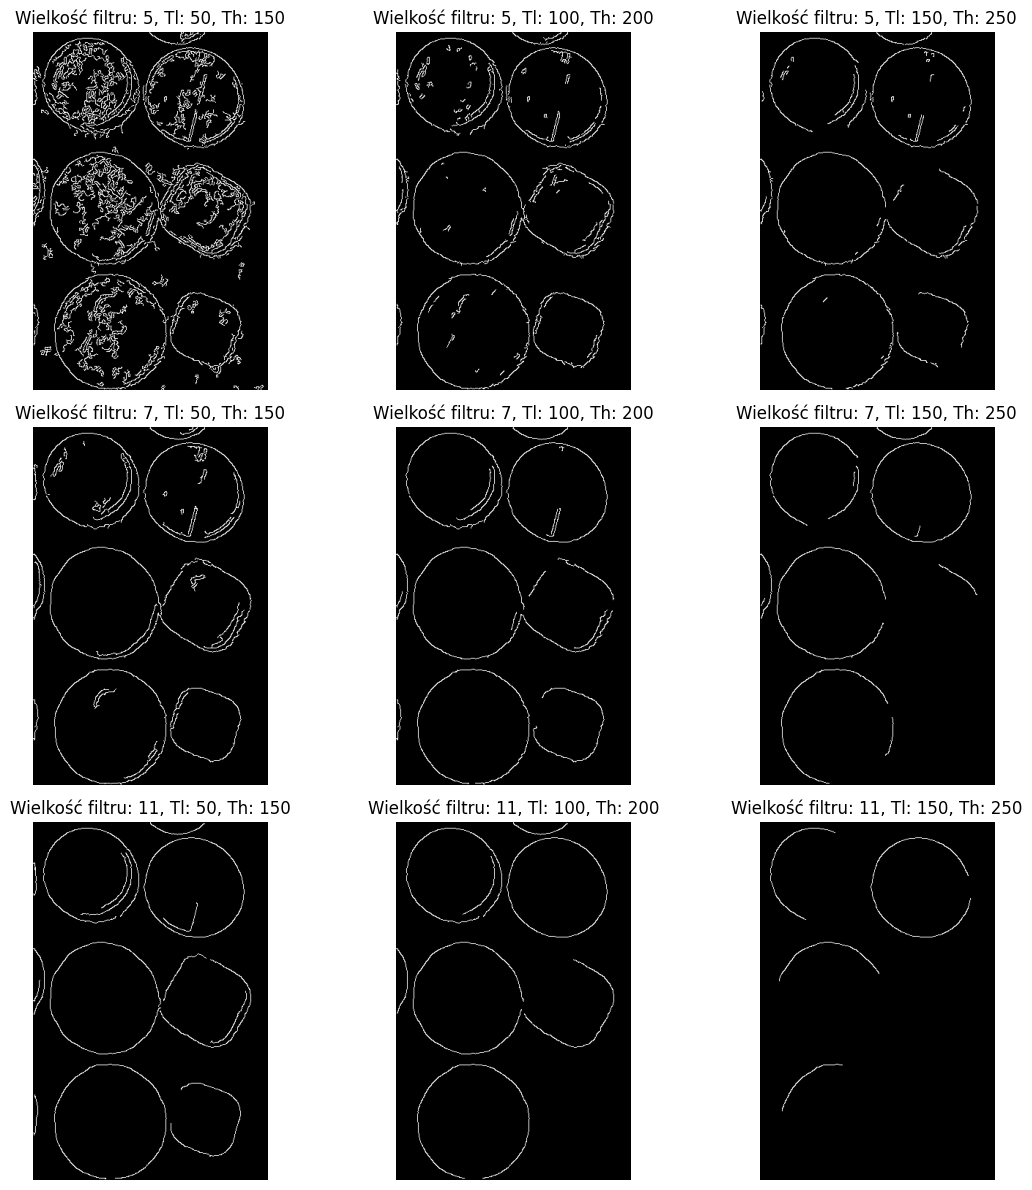

In [91]:
gauss_values = [5, 7, 11]  
canny_thresholds = [(50, 150), (100, 200), (150, 250)]  

plt.figure(figsize=(12, 12))
for i, gauss_size in enumerate(gauss_values):
    for j, (thresh1, thresh2) in enumerate(canny_thresholds):
        edges = canny_gauss(coins_noise, gauss_size, thresh1, thresh2)
        
        plt.subplot(len(gauss_values), len(canny_thresholds), i * len(canny_thresholds) + j + 1)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Wielkość filtru: {gauss_size}, Tl: {thresh1}, Th: {thresh2}')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [81]:
def canny_median(img, k_size, t_low, t_high):
    
    blurred_image = cv2.medianBlur(img, k_size, 0)
    
    edges = cv2.Canny(blurred_image, t_low, t_high)
    
    return edges

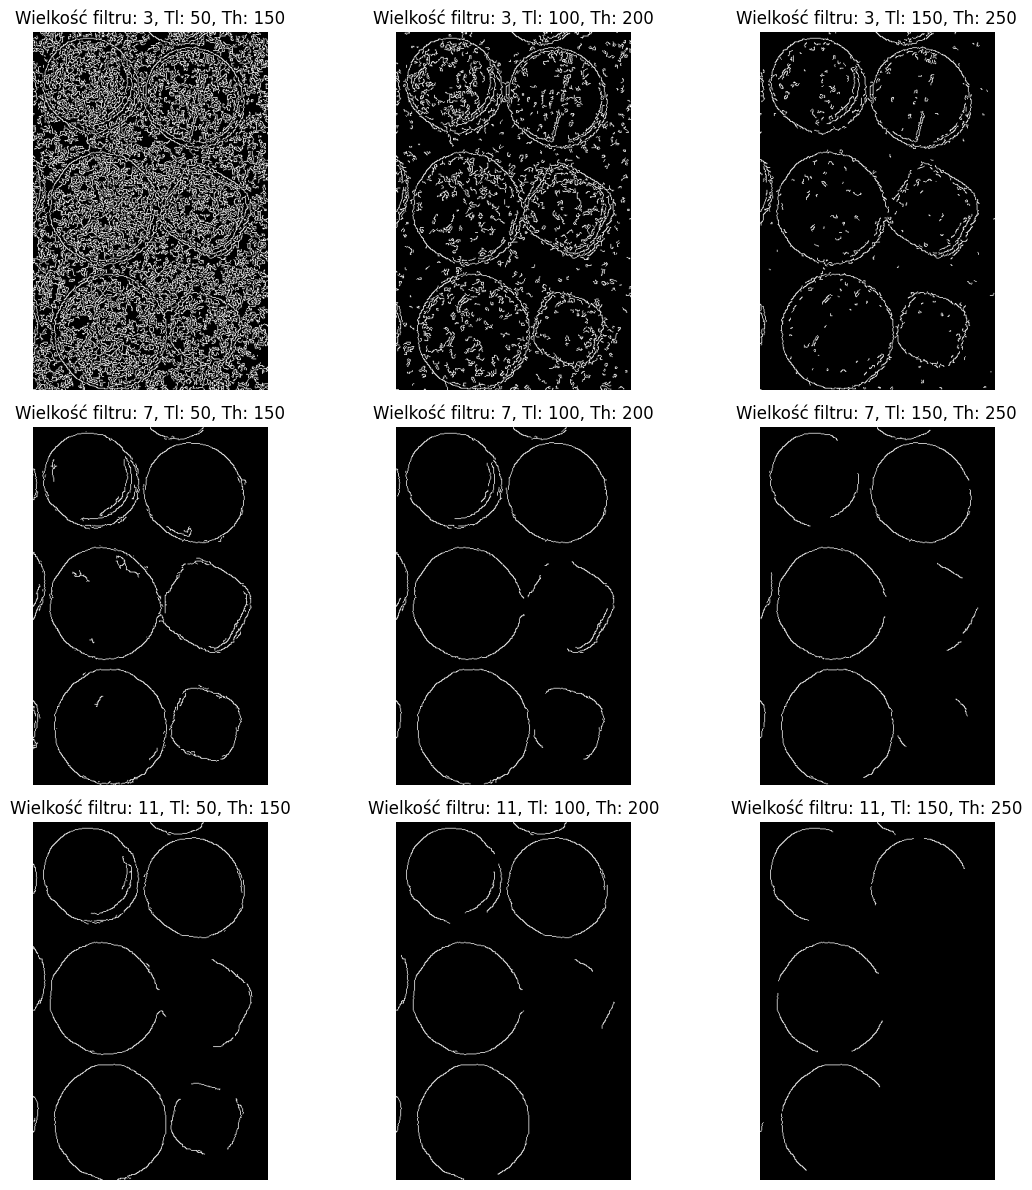

In [82]:
gauss_values = [3, 7, 11]  
canny_thresholds = [(50, 150), (100, 200), (150, 250)]  

plt.figure(figsize=(12, 12))
for i, gauss_size in enumerate(gauss_values):
    for j, (thresh1, thresh2) in enumerate(canny_thresholds):
        edges = canny_median(coins_noise, gauss_size, thresh1, thresh2)
        
        plt.subplot(len(gauss_values), len(canny_thresholds), i * len(canny_thresholds) + j + 1)
        plt.imshow(edges, cmap='gray')
        plt.title(f'Wielkość filtru: {gauss_size}, Tl: {thresh1}, Th: {thresh2}')
        plt.axis('off')

plt.tight_layout()
plt.show()


---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

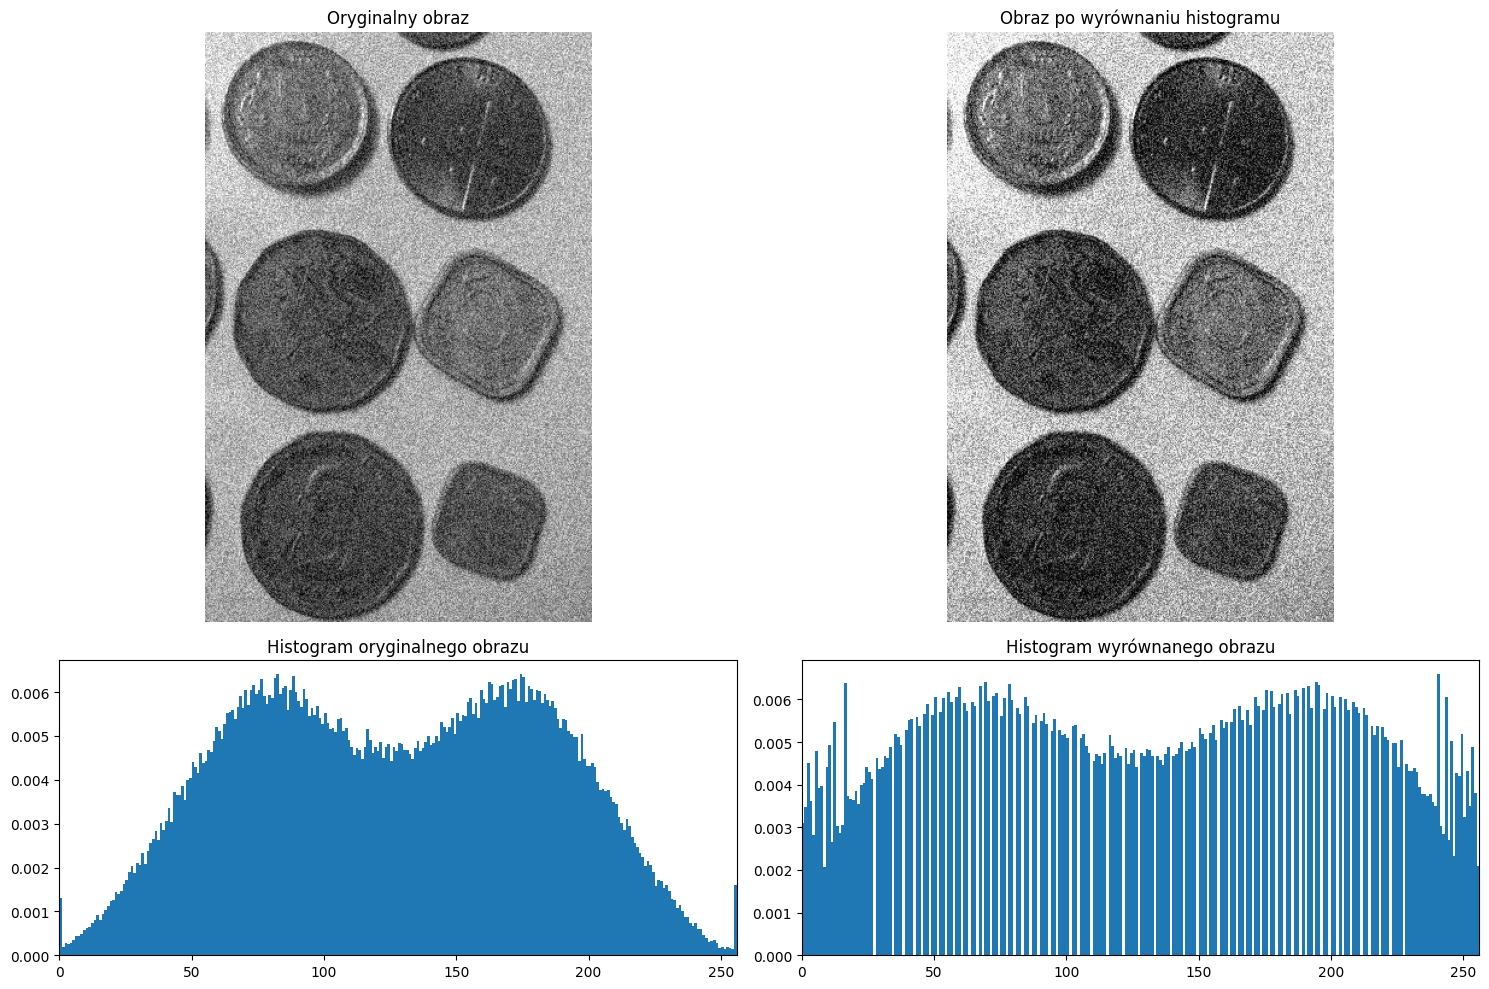

In [92]:
equalized_image = cv2.equalizeHist(coins_noise)

fig, ax = plt.subplots(2, 2, figsize=(15, 10), height_ratios=[2, 1])

ax[0, 0].imshow(coins_noise, cmap='gray')
ax[0, 0].set_title('Oryginalny obraz')
ax[0, 0].axis('off')

# Histogram oryginalnego obrazu
ax[1, 0].hist(coins_noise.ravel(), 256, [0, 256], density=True)
ax[1, 0].set_title('Histogram oryginalnego obrazu')
ax[1, 0].set_xlim([0, 256])

# Obraz po wyrównaniu histogramu
ax[0, 1].imshow(equalized_image, cmap='gray')
ax[0, 1].set_title('Obraz po wyrównaniu histogramu')
ax[0, 1].axis('off')

# Histogram wyrównanego obrazu
ax[1, 1].hist(equalized_image.ravel(), 256, [0, 256], density=True)
ax[1, 1].set_title('Histogram wyrównanego obrazu')
ax[1, 1].set_xlim([0, 256])

# Dostosowanie układu
plt.tight_layout()
plt.show()


---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

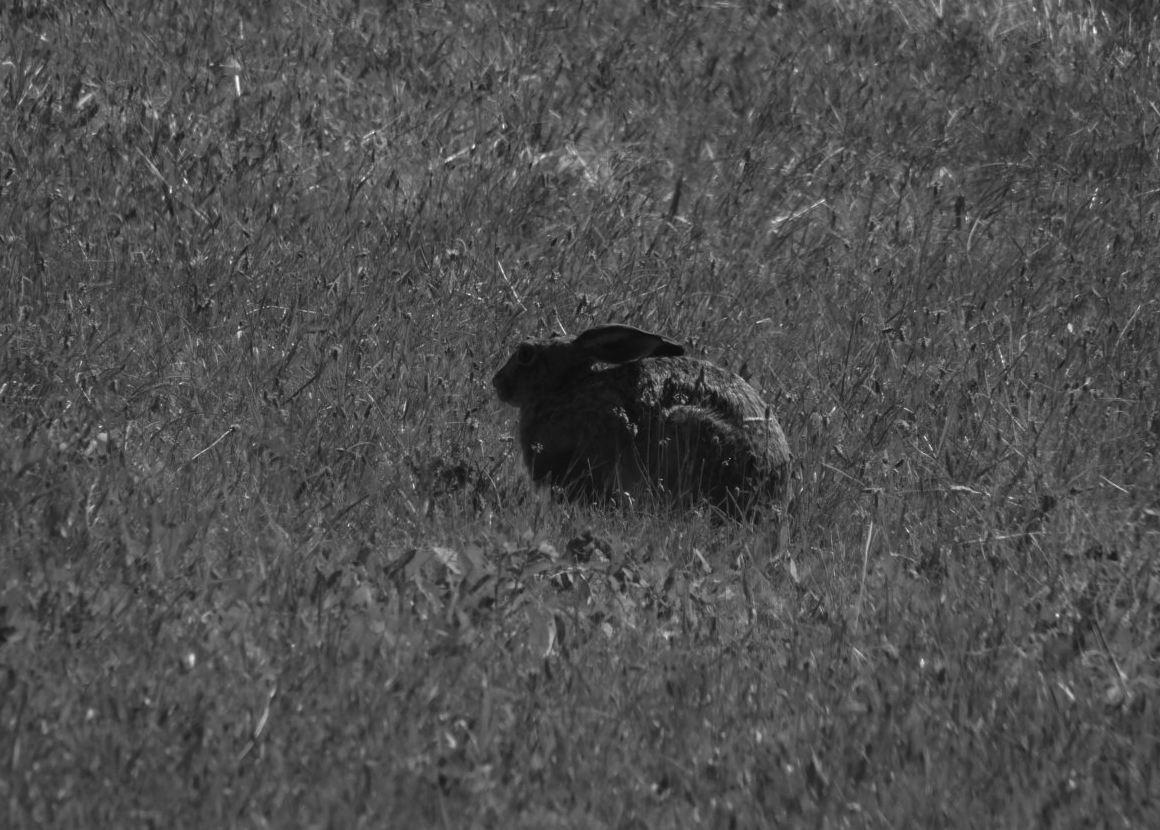

In [15]:
hare_gray = cv2.imread('Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

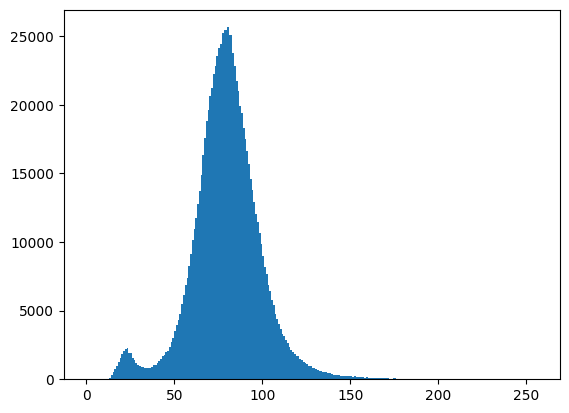

In [19]:
plt.hist(hare_gray.ravel(), 256, [0, 256])
plt.show()

In [82]:
def process_distribution(image, dist_name):
    if dist_name == 'normal':
        normal = stats.norm.pdf(np.arange(256), loc=15, scale=15)
        lut = np.interp(normal, (normal.min(), normal.max()), (0, 255)).astype('uint8')
    elif dist_name == 'cauchy':
        cauchy = stats.cauchy.pdf(np.arange(256), 20, 15)
        lut = np.interp(cauchy, (cauchy.min(), cauchy.max()), (0, 255)).astype('uint8')
    elif dist_name == 'levy':
        levy = stats.levy.pdf(np.arange(256), loc=0, scale=10)
        lut = np.interp(levy, (levy.min(), levy.max()), (0, 255)).astype('uint8')
    elif dist_name == 'exponential':
        expon = stats.expon.pdf(np.arange(256), loc=0, scale=20)
        lut = np.interp(expon, (expon.min(), expon.max()), (0, 255)).astype('uint8')


    transformed_image = cv2.LUT(image, lut)

    _, otsu_binary_image = cv2.threshold(transformed_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    return transformed_image, otsu_binary_image, lut

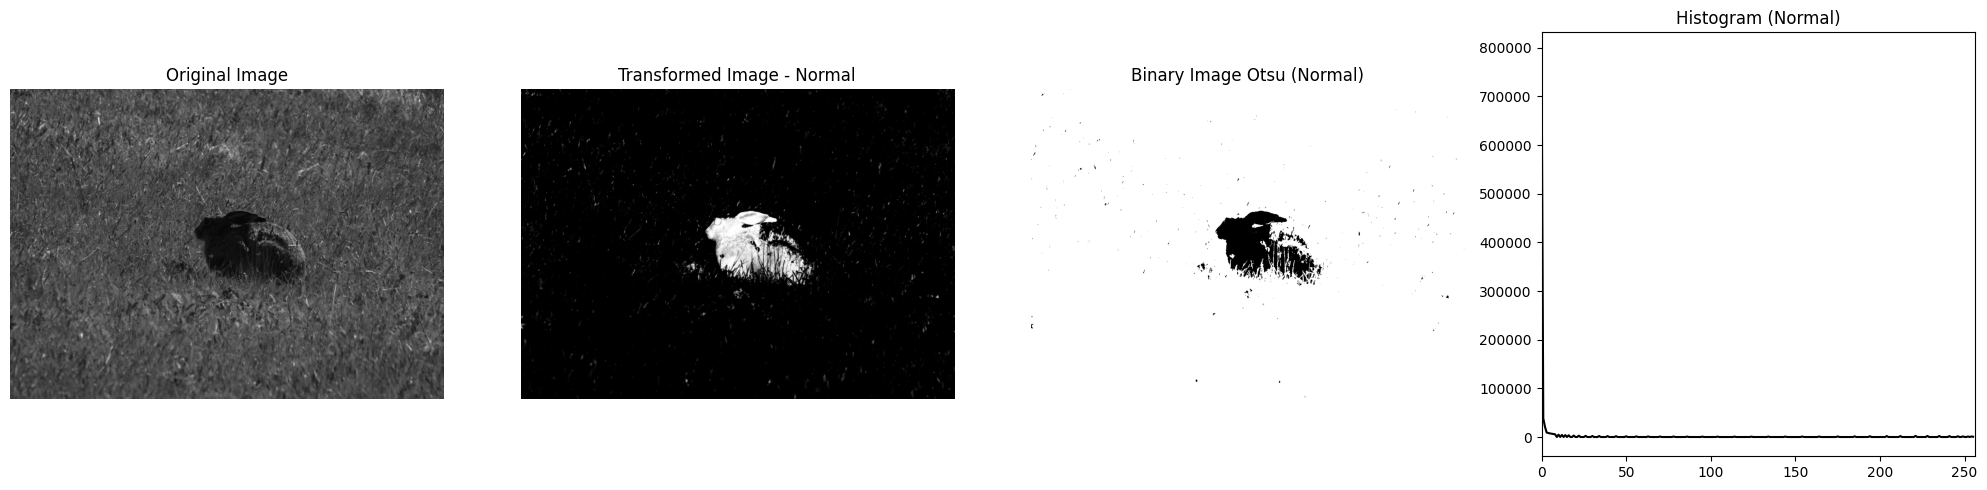

In [87]:
transformed_image_normal, otsu_binary_image_normal, lut_normal = process_distribution(hare_gray, 'normal')

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(hare_gray, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(transformed_image_normal, cmap='gray')
axs[1].set_title('Transformed Image - Normal')
axs[1].axis('off')

axs[2].imshow(otsu_binary_image_normal, cmap='gray')
axs[2].set_title('Binary Image Otsu (Normal)')
axs[2].axis('off')

transformed_hist_normal = cv2.calcHist([transformed_image_normal], [0], None, [256], [0, 256])
axs[3].plot(transformed_hist_normal, color='black')
axs[3].set_title('Histogram (Normal)')
axs[3].set_xlim([0, 256])

plt.tight_layout()
plt.show()


In [94]:
hare_gray.shape

(830, 1160)

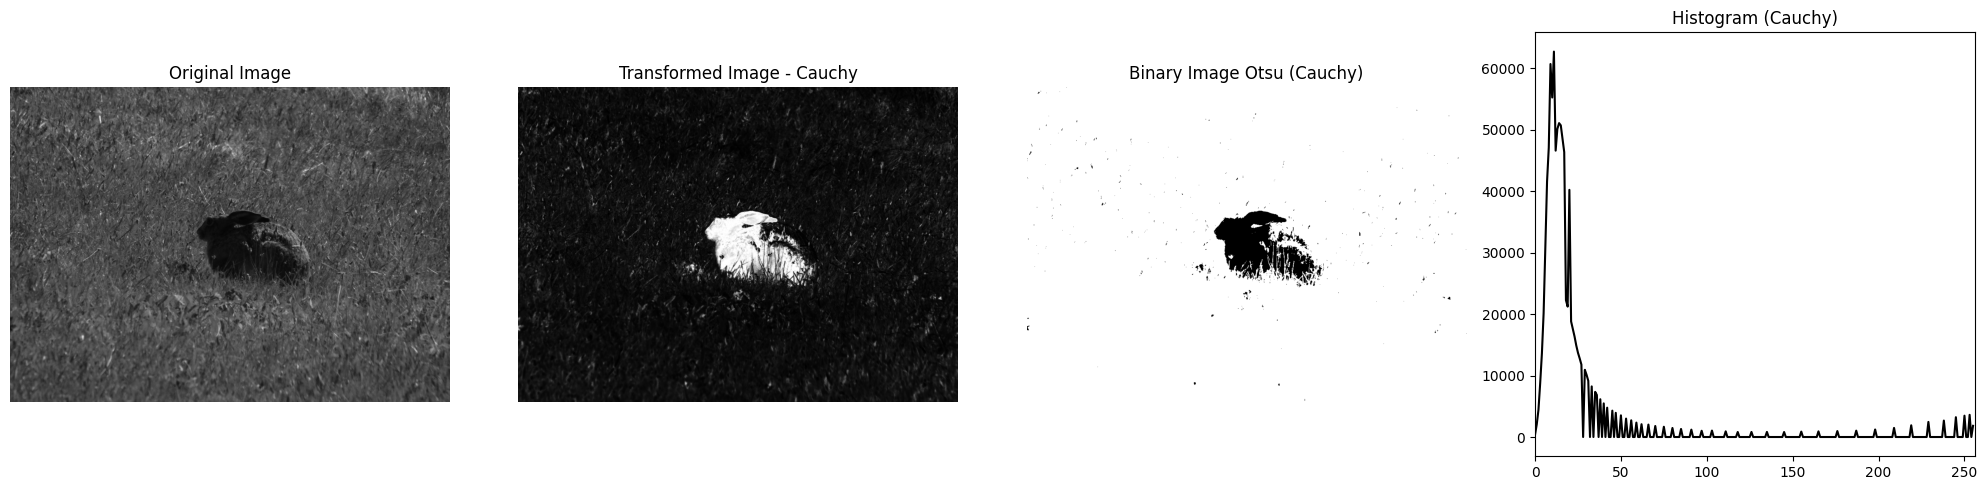

In [57]:
transformed_image_cauchy, otsu_binary_image_cauchy, lut_cauchy = process_distribution(hare_gray, 'cauchy')

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(hare_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(transformed_image_cauchy, cmap='gray')
plt.title('Transformed Image - Cauchy')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(otsu_binary_image_cauchy, cmap='gray')
plt.title('Binary Image Otsu (Cauchy)')
plt.axis('off')

transformed_hist_cauchy = cv2.calcHist([transformed_image_cauchy], [0], None, [256], [0, 256])
plt.subplot(1, 4, 4)
plt.plot(transformed_hist_cauchy, color='black')
plt.title('Histogram (Cauchy)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


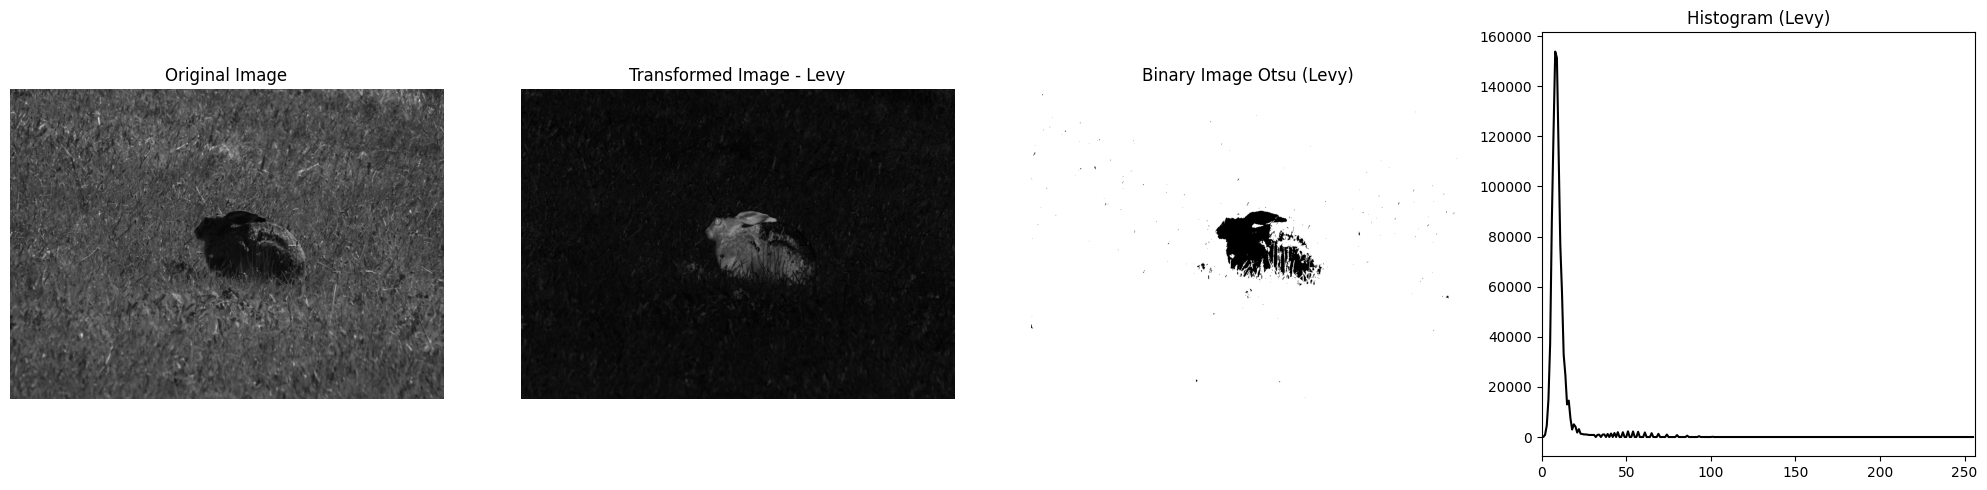

In [58]:
transformed_image_levy, otsu_binary_image_levy, lut_levy = process_distribution(hare_gray, 'levy')

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(hare_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(transformed_image_levy, cmap='gray')
plt.title('Transformed Image - Levy')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(otsu_binary_image_levy, cmap='gray')
plt.title('Binary Image Otsu (Levy)')
plt.axis('off')

transformed_hist_levy = cv2.calcHist([transformed_image_levy], [0], None, [256], [0, 256])
plt.subplot(1, 4, 4)
plt.plot(transformed_hist_levy, color='black')
plt.title('Histogram (Levy)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


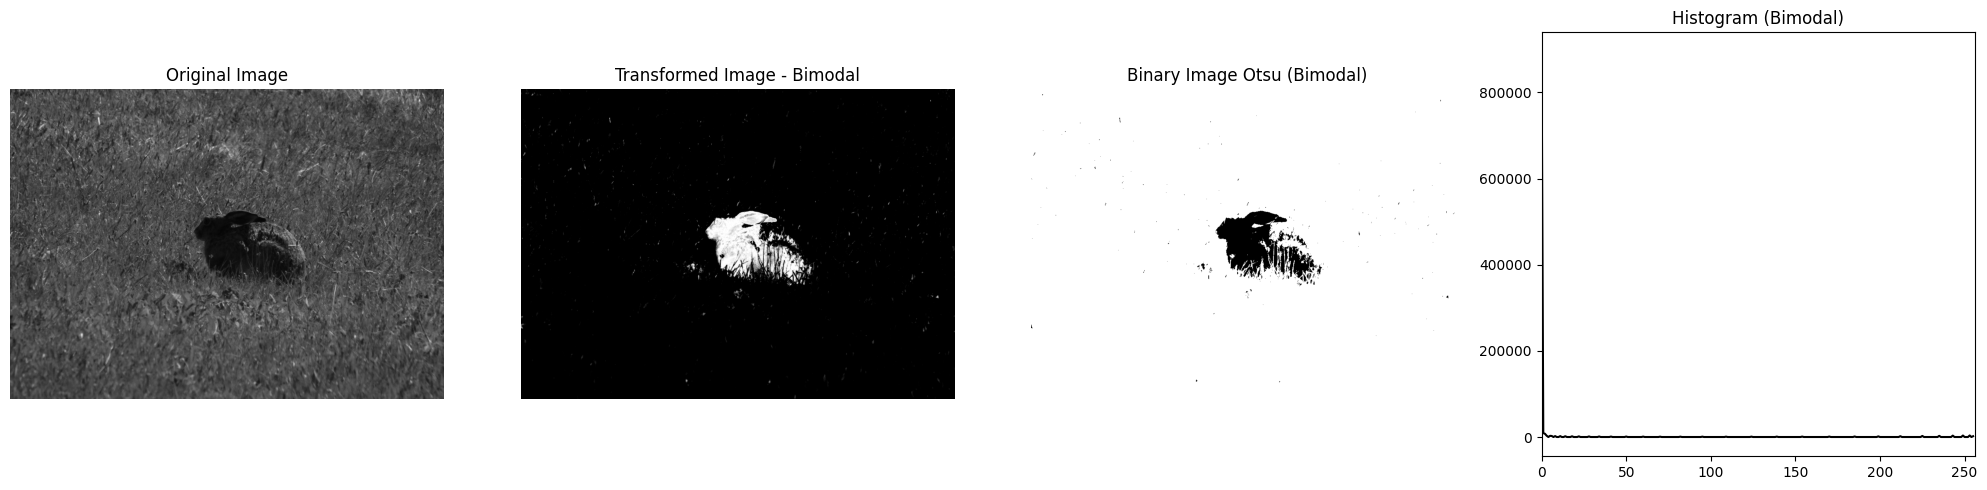

In [60]:
def process_distribution(image, dist_name):
    if dist_name == 'bimodal':
        bimodal = 0.5 * stats.norm.pdf(np.arange(256), loc=20, scale=10) + \
                   0.5 * stats.norm.pdf(np.arange(256), loc=240, scale=10)
        lut = np.interp(bimodal, (bimodal.min(), bimodal.max()), (0, 255)).astype('uint8')
    transformed_image = cv2.LUT(image, lut)
    _, otsu_binary_image = cv2.threshold(transformed_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return transformed_image, otsu_binary_image, lut

transformed_image_bimodal, otsu_binary_image_bimodal, lut_bimodal = process_distribution(hare_gray, 'bimodal')

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(hare_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(transformed_image_bimodal, cmap='gray')
plt.title('Transformed Image - Bimodal')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(otsu_binary_image_bimodal, cmap='gray')
plt.title('Binary Image Otsu (Bimodal)')
plt.axis('off')

transformed_hist_bimodal = cv2.calcHist([transformed_image_bimodal], [0], None, [256], [0, 256])
plt.subplot(1, 4, 4)
plt.plot(transformed_hist_bimodal, color='black')
plt.title('Histogram (Bimodal)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

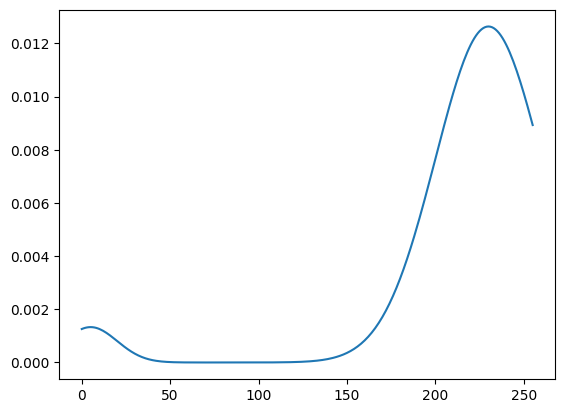

In [66]:
bimodal = 0.05 * stats.norm.pdf(np.arange(256), loc=5, scale=15) + 0.95 * stats.norm.pdf(np.arange(256), loc=230, scale=30)
plt.plot(bimodal)

[  0   0   0   0   0   0   0   0   0   0   1   1   1   3   5   5   8   8
   8  10  10  10  13  13  13  13  16  16  16  16  16  19  19  19  23  23
  23  23  29  29 133 150 150 157 161 164 166 170 172 175 176 179 182 183
 183 186 188 190 191 194 196 197 200 202 203 205 207 209 211 213 214 216
 218 218 220 222 223 225 227 228 230 231 233 234 235 236 238 239 240 241
 242 242 243 243 244 245 246 247 247 248 248 249 249 250 250 250 251 251
 251 251 252 252 252 252 253 253 253 253 253 253 253 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

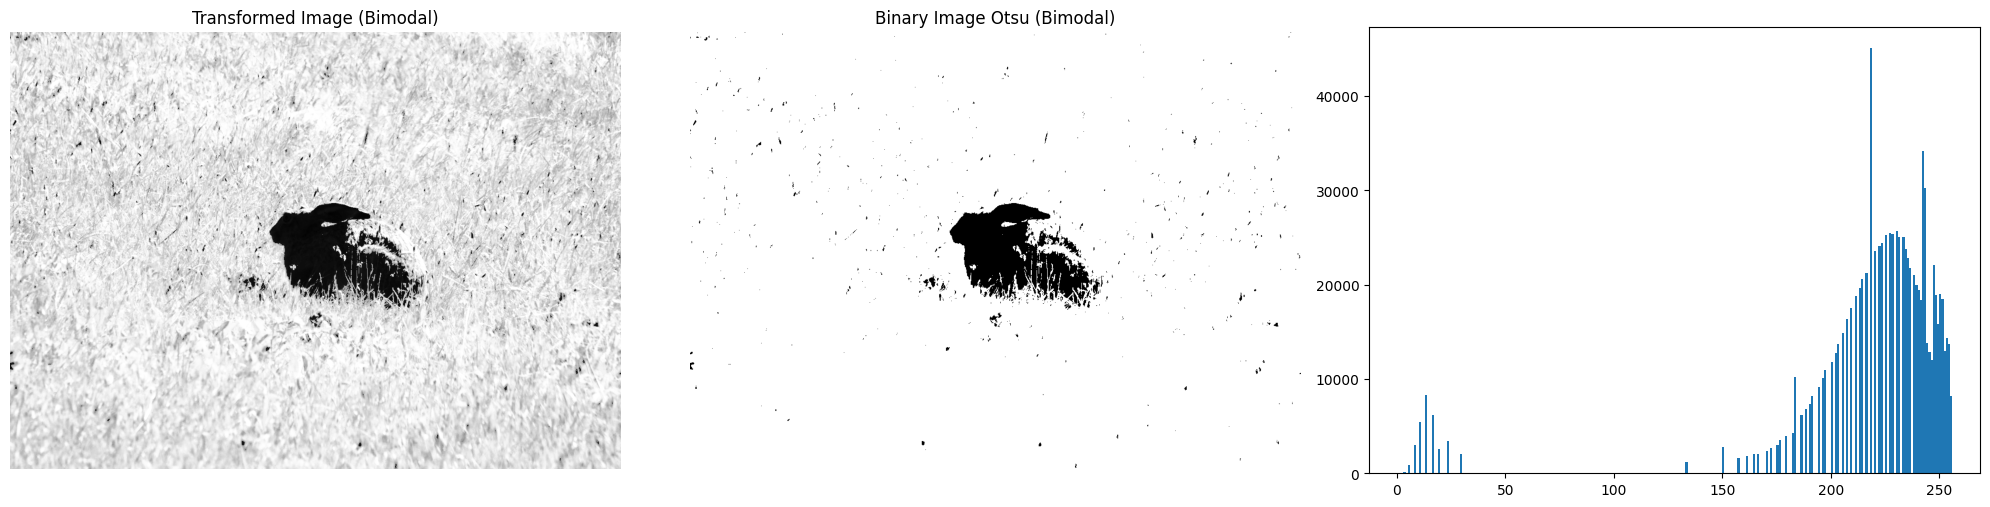

In [68]:
bim_cdf = np.cumsum(bimodal)
bin_norm = bim_cdf / bim_cdf[-1]

hist, b = np.histogram(hare_gray, 256)
cumsum = hist.cumsum()
cdf_normalized = cumsum / cumsum[-1]*255
cdf_normalized = cdf_normalized.astype('uint8')

x = np.arange(256)
target_cdf = bin_norm
target_normalized = np.round(target_cdf * 255).astype('uint8')
lut = np.searchsorted(target_normalized, cdf_normalized).astype('uint8')
print(lut)
transformed_image = cv2.LUT(hare_gray, lut)

_, otsu_binary_image = cv2.threshold(transformed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image (Bimodal)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(otsu_binary_image, cmap='gray')
plt.title('Binary Image Otsu (Bimodal)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.hist(transformed_image.flatten(), 256, [0, 256])

plt.tight_layout()
plt.show()

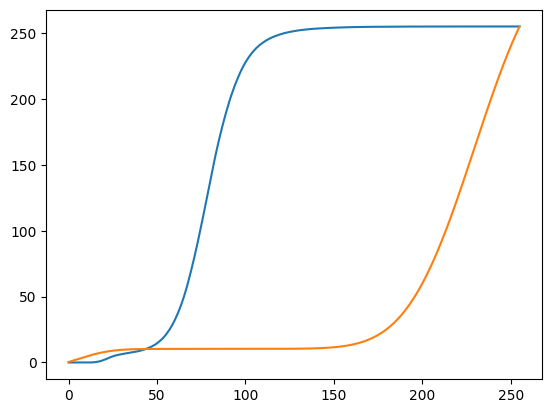

In [70]:
hare_hist = cv2.calcHist([hare_gray], [0], None, [256], [0, 256])
hare_cdf = np.cumsum(hare_hist)
hare_cdf = hare_cdf / hare_cdf[-1]*255
plt.plot(hare_cdf)
plt.plot(bin_norm*255)